# Análise estatística dos dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import seaborn as sns
import math
import statsmodels.api as sm
import pylab as py
import random
from plotnine import *

In [3]:
df = pd.read_csv('vacine_tweets_completoDezJanFevTratado.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2125 entries, 0 to 2124
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Apelido      2122 non-null   object
 1   Username     2114 non-null   object
 2   Data/Hora    2125 non-null   object
 3   Respondendo  2125 non-null   object
 4   Texto        1143 non-null   object
 5   link_img     2125 non-null   object
 6   Comentarios  2125 non-null   int64 
 7   Retweets     2125 non-null   int64 
 8   Likes        2125 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 149.5+ KB


In [96]:
df.head(10)

,Apelido,Username,Data/Hora,Respondendo,Texto,link_img,Comentarios,Retweets,Likes
0,Eder Morselli,@edermorselli,2020-11-30T23:54:49.000Z,A pandemia não acabou... Vamos nos proteger......,NaN,https://pbs.twimg.com/media/EoHB4fVXMAEdkk5?fo...,0,1,1
1,V,@VR_SSC,2020-11-30T23:53:24.000Z,Em resposta a \n@KooperHD,Os caras tacam capa variante logo quando a kug...,https://abs-0.twimg.com/emoji/v2/72x72/1f643.png,0,0,2
2,Lucas França,@FrancaComAmor,2020-11-30T23:53:32.000Z,Publico na \n@RevistaEpoca\n um papo que tive ...,Covid-19: Quem deve receber primeiro a vacina?...,https://pbs.twimg.com/card_img/136204193687451...,0,6,27
3,calcinha chromatica,@fckwithmyselff,2020-11-30T23:52:55.000Z,eu só penso nela (a vacina),NaN,https://pbs.twimg.com/media/EoHBcUKWEAEcXHx?fo...,1,4,4
4,Rafa_SCH,@RafaSCHk,2020-11-30T23:54:43.000Z,"Difícil, mas acho que pegaria a variante",Comentar o Tweet\nKooper // 110K no Youtube\n@...,https://pbs.twimg.com/profile_images/129763947...,0,0,1
5,sereia,@AnjinhoJuu,2020-11-30T23:55:54.000Z,vai jacare jacare \ncomprei um lança p baforar...,Comentar o Tweet\n𝐩𝐞𝐝𝐫𝐨\n@Crf_pedrolcs\n · 30 ...,https://pbs.twimg.com/profile_images/134771989...,1,0,1
6,danka ୭̥⋆*｡,@offfluencer,2020-11-30T23:57:52.000Z,11 amigas p recriar essa dps da vacina?,NaN,https://pbs.twimg.com/media/EoHClIRXMAUBcNM?fo...,6,0,13
7,amandoim,@lmxcncoarreaga,2020-11-30T23:46:30.000Z,a vacina tá sendo desenvolvida rápido por cont...,Comentar o Tweet\nCONTIGO!\n@tocontigo\n · 30 ...,https://pbs.twimg.com/profile_images/925778444...,0,0,5
8,Victor Zenatti,@ZenattiVictor,2020-11-30T23:57:14.000Z,"Pra iniciar dezembro com energias ótimas, com ...",NaN,https://pbs.twimg.com/media/EoHCcBaWEAMrHmL?fo...,0,0,2
9,CNN Brasil,@CNNBrasil,2020-11-30T23:29:05.000Z,Documentos obtidos com exclusividade pela CNN ...,NaN,https://pbs.twimg.com/media/EoG7_hWVkAMxG-Y?fo...,2100,2200,7800


In [4]:
df_red = df[['Comentarios', 'Retweets', 'Likes']].copy()

In [5]:
df_red.describe()

,Comentarios,Retweets,Likes
count,2125.000000,2125.000000,2125.000000
mean,35.097882,50.677176,262.157647
std,277.683715,376.650455,1894.068522
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000
50%,1.000000,1.000000,7.000000
75%,2.000000,5.000000,27.000000
max,6200.000000,9900.000000,47800.000000


### Média

In [6]:
print(df_red['Likes'].mean())
print(df_red['Retweets'].mean())
print(df_red['Comentarios'].mean())

262.15764705882356
50.677176470588236
35.09788235294118


### Mediana

In [7]:
print(df_red['Likes'].median())
print(df_red['Comentarios'].median())
print(df_red['Retweets'].median())

7.0
1.0
1.0


## Estimativa de variabilidade (Medidas de dispersão)

### Desvio

In [8]:
media_likes = df_red['Likes'].mean()
media_ret = df_red['Retweets'].mean()
media_com = df_red['Comentarios'].mean()

In [9]:
d = df_red['Likes'].apply(lambda x: x - media_likes)
d

0      -261.157647
1      -260.157647
2      -235.157647
3      -258.157647
4      -261.157647
           ...    
2120   -262.157647
2121   -186.157647
2122   -262.157647
2123   -262.157647
2124   -260.157647
Name: Likes, Length: 2125, dtype: float64

In [10]:
d = df_red['Retweets'].apply(lambda x: x - media_ret)
d

0      -49.677176
1      -50.677176
2      -44.677176
3      -46.677176
4      -50.677176
          ...    
2120   -50.677176
2121   -35.677176
2122   -50.677176
2123   -50.677176
2124   -49.677176
Name: Retweets, Length: 2125, dtype: float64

In [11]:
d = df_red['Comentarios'].apply(lambda x: x - media_com)
d

0      -35.097882
1      -35.097882
2      -35.097882
3      -34.097882
4      -35.097882
          ...    
2120   -35.097882
2121   -27.097882
2122   -35.097882
2123   -35.097882
2124   -34.097882
Name: Comentarios, Length: 2125, dtype: float64

### Desvio absoluto médio

In [12]:
print(df_red['Likes'].mad())
print(df_red['Retweets'].mad())
print(df_red['Comentarios'].mad())

442.5119933564084
86.75883847750724
61.48903595847936


In [13]:
print(df_red['Likes'].var())
print(df_red['Retweets'].var())
print(df_red['Comentarios'].var())

3587495.565060349
141865.56522743055
77108.24559344162


### Boxplots

#### Likes

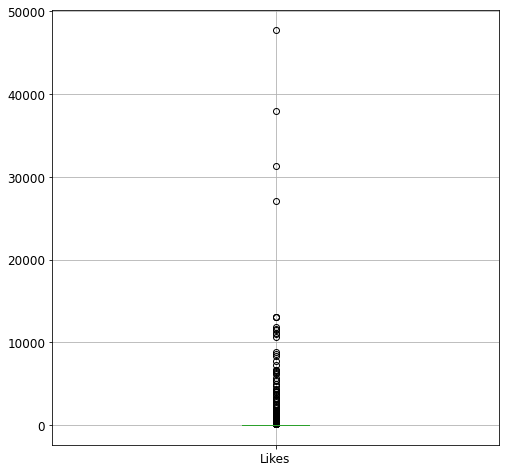

In [14]:
df_red.boxplot(column=['Likes'], fontsize='large', figsize=(8,8))

#### Retweets

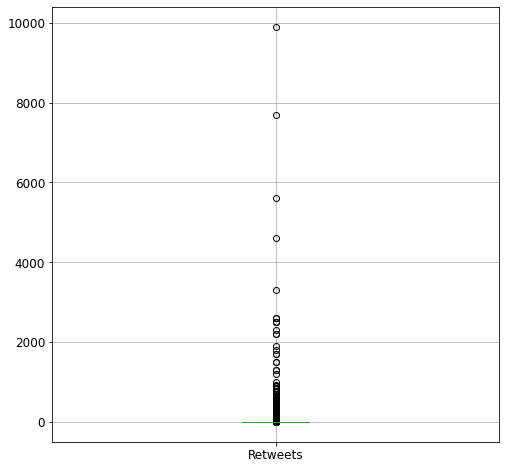

In [28]:
df_red.boxplot(column=['Retweets'], fontsize='large', figsize=(8,8))

#### Comentários

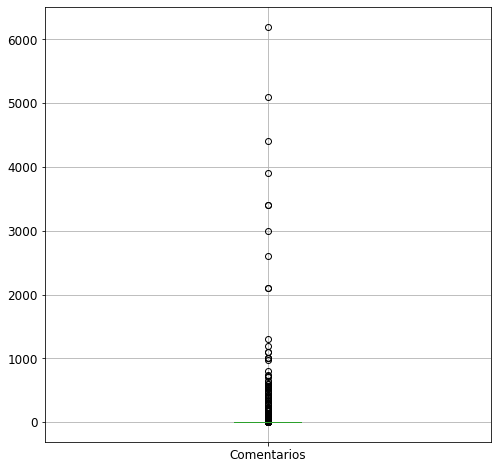

In [29]:
df_red.boxplot(column=['Comentarios'], fontsize='large', figsize=(8,8))

### Histograma

In [15]:
# calculando bins
k_likes = math.ceil(1 + 3.3 * math.log10( df_red['Likes'].size ))
k_ret = math.ceil(1 + 3.3 * math.log10( df_red['Retweets'].size ))
k_com = math.ceil(1 + 3.3 * math.log10( df_red['Comentarios'].size ))

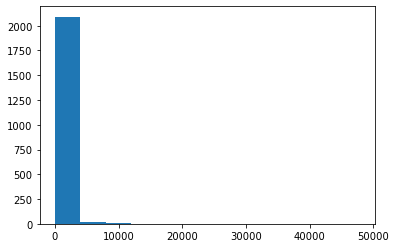

In [16]:
import matplotlib.pyplot as plt
plt.hist(df_red['Likes'], bins=k_likes)
plt.show()

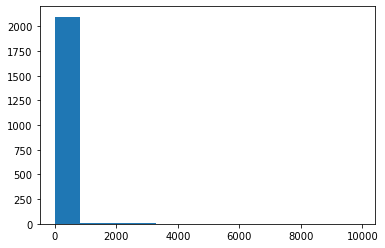

In [17]:
import matplotlib.pyplot as plt
plt.hist(df_red['Retweets'], bins=k_ret)
plt.show()

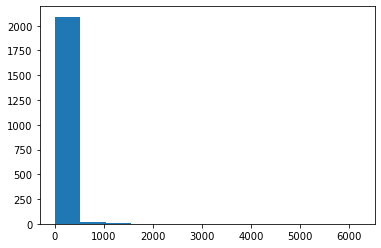

In [18]:
import matplotlib.pyplot as plt
plt.hist(df_red['Comentarios'], bins=k_com)
plt.show()

### Correlações

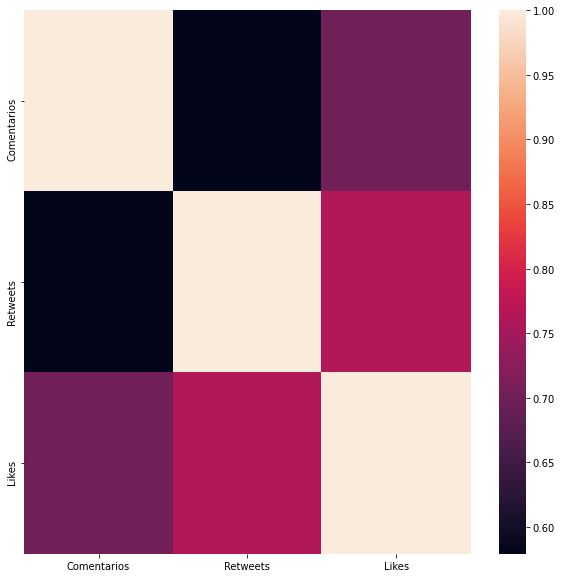

In [53]:
%matplotlib inline

plt.figure(figsize=(10,10)) 
sns.heatmap(df_red.corr(method='spearman'))

- Utilizando o método de spearman pois neste ponto desconheço a distribuição dos dados.<br />
- Vemos que a maior correlação se da entre Likes e Retweets

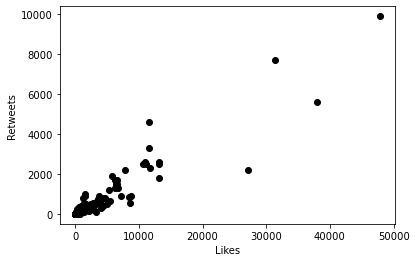

In [64]:
plt.scatter(df_red['Likes'], df_red['Retweets'], c='k')

plt.xlabel("Likes")
plt.ylabel("Retweets")

plt.show()

In [97]:
df.query('Likes > 40000')

,Apelido,Username,Data/Hora,Respondendo,Texto,link_img,Comentarios,Retweets,Likes
258,Eixo Político,@eixopolitico,2020-12-14T16:33:16.000Z,"Hoje, nos Estados Unidos.",NaN,https://pbs.twimg.com/media/EpNjEq4XIAQ_wZH?fo...,431,9900,47800


## Boostrap

In [83]:
likes = df_red['Likes'].tolist()
comentarios = df_red['Comentarios'].tolist()
retweets = df_red['Retweets'].tolist()

In [85]:
print(np.median(likes))
print(np.median(comentarios))
print(np.median(retweets))

7.0
1.0
1.0


#### Teorema do limite central usando bootstrap

In [86]:
sample_mean_likes = []
sample_mean_com = []
sample_mean_ret = []

# Bootstrap sampling

for i in range(80):
    y = random.sample(likes, 5)
    avg = np.median(y)
    sample_mean_likes.append(np.round(avg,0))

for i in range(80):
    y = random.sample(comentarios, 5)
    avg = np.median(y)
    sample_mean_com.append(np.round(avg,0))
    
for i in range(80):
    y = random.sample(retweets, 5)
    avg = np.median(y)
    sample_mean_ret.append(np.round(avg,0))

In [87]:
print(np.mean(sample_mean_likes))
print(np.mean(sample_mean_com))
print(np.mean(sample_mean_ret))

11.475
1.4375
1.6625


#### Histograma das médias gerada pela amostra

##### Likes

In [88]:
k = math.ceil(1 + 3.3 * math.log10(len(sample_mean_likes)))
k

8

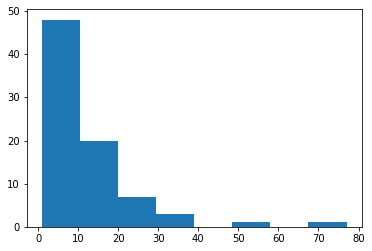

In [90]:
plt.hist(sample_mean_likes, bins=k) 
plt.show()

##### Comentarios

In [91]:
k = math.ceil(1 + 3.3 * math.log10(len(sample_mean_com)))
k

8

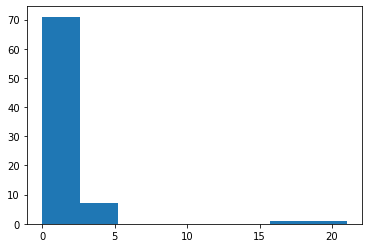

In [92]:
plt.hist(sample_mean_com, bins=k) 
plt.show()

##### Retweets

In [93]:
k = math.ceil(1 + 3.3 * math.log10(len(sample_mean_ret)))
k

8

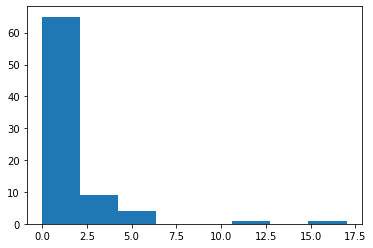

In [94]:
plt.hist(sample_mean_ret, bins=k) 
plt.show()

### Distribuição normal

In [113]:
freq_df_likes = df_red.groupby('Likes').size().reset_index(name='Fabs')
freq_df_com = df_red.groupby('Comentarios').size().reset_index(name='Fabs')
freq_df_ret = df_red.groupby('Retweets').size().reset_index(name='Fabs')

In [123]:
length = freq_df_com['Comentarios']
labels = freq_df_com['Fabs']

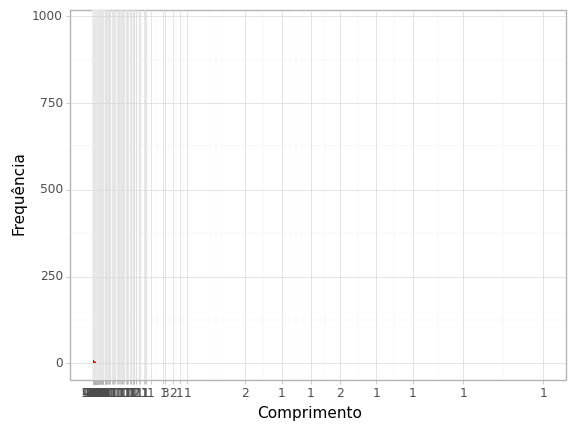

<ggplot: (146629221102)>

In [124]:
(ggplot(freq_df_com, aes(freq_df_com['Comentarios'],'Fabs'))
  + geom_col(fill='red')
  + scale_x_continuous(breaks=length, labels=labels)
  + theme_light()
  + xlab('Comprimento')
  + ylab('Frequência')
)

### Distribuição normal de amostras

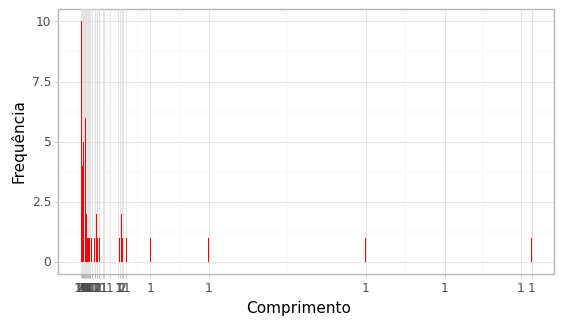

<ggplot: (146624127016)>

In [168]:
rs_likes = random.sample(likes, 100)

df_rs_likes = pd.DataFrame(np.array(rs_likes), columns = list("a"))
df_rs_likes.rename(columns={'a': 'Likes'}, inplace = True)

filtro = df_rs_likes['Likes'] < 1000
df_rs_likes = df_rs_likes[filtro]

freq_df_likes = df_rs_likes.groupby('Likes').size().reset_index(name='Fabs')
#freq_df_com = df_red.groupby('Comentarios').size().reset_index(name='Fabs')
#freq_df_ret = df_red.groupby('Retweets').size().reset_index(name='Fabs')

length = freq_df_likes['Likes']
labels = freq_df_likes['Fabs']

(ggplot(freq_df_likes, aes(freq_df_likes['Likes'],'Fabs'))
  + geom_col(fill='red')
  + scale_x_continuous(breaks=length, labels=labels)
  + theme_light()
  + xlab('Comprimento')
  + ylab('Frequência')
  + coord_fixed(ratio=50)
)

### Aplicando normalização z-score

In [178]:
df_red_z = stats.zscore(df_red['Likes'])
df_red_z

array([-0.13791429, -0.1373862 , -0.124184  , ..., -0.13844238,
       -0.13844238, -0.1373862 ])

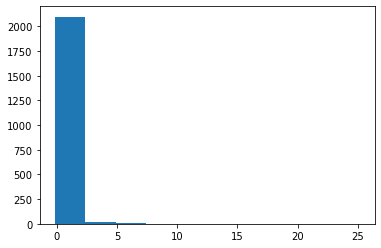

In [179]:
plt.hist(df_red_z) 
plt.show()

#### QQPlot

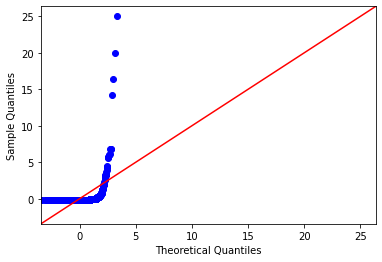

In [180]:
sm.qqplot(df_red_z, line ='45') 
py.show()

### Transformação logarítimica

#### scaterplot de relação entre Likes e Retweets orginal

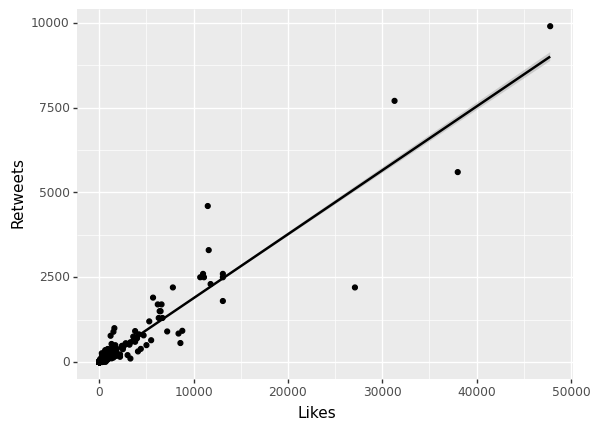

<ggplot: (146627230838)>

In [192]:
(ggplot(df_red, aes(df_red['Likes']+1, df_red['Retweets']+1))
+ geom_point() 
+ geom_smooth(method='lm')
)

#### scaterplot de relação entre Likes e Retweets aplicando logaritmo

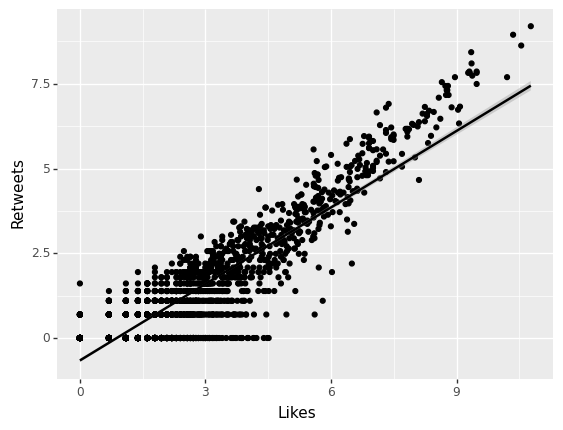

<ggplot: (146624200102)>

In [188]:
(ggplot(df_red, aes(np.log(df_red['Likes']+1), np.log(df_red['Retweets']+1)))
+ geom_point() #### scaterplot de relação entre Likes e Retweets orginal
+ geom_smooth(method='lm')
)

#### Histograma dos dados normalizados por transformação logaritmica

In [193]:
k = math.ceil(1 + 3.3 * math.log10( df_red['Likes'].size ))
k

12

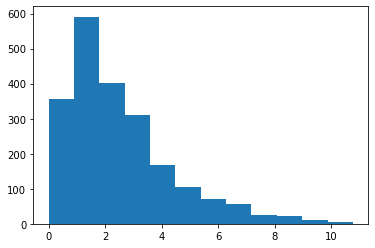

In [195]:
plt.hist(np.log(df_red['Likes']+1), bins=k)
plt.show()